<a href="https://colab.research.google.com/github/Team7-Sept2021/test/blob/main/Data_Science_Project_by_Papastratos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier


from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
np.set_printoptions(precision=3)

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
pd.set_option('precision', 3)


In [204]:
df = pd.read_excel("mpg.data.xlsx")
df = df.dropna(axis=1, thresh= 200)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displayments  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


In [205]:
df.head(10)

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


The above nine columns with data:


1.   mpg (miles per gallon)
2.   cylinders (number of cylinders)
1.   displayments
2.   horsepower
1.   weight (in kilos)
2.   acceleration
1.   model year (only the last two digit of the year)
2.   origin (as number)
1.   car name (company[space]specific_model )-----------

So, 406 inputs and 9 columns in total. Important!! Columns 10-13 have not column names

# Περιγραφική Στατιστική

In [206]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.515,7.816,9.0,17.50,23.0,29.000,46.6
cylinders,406.0,5.475,1.712,3.0,4.00,4.0,8.000,8.0
displayments,406.0,194.780,104.922,68.0,105.00,151.0,302.000,455.0
horsepower,400.0,105.082,38.769,46.0,75.75,95.0,130.000,230.0
weight,406.0,2979.414,847.004,1613.0,2226.50,2822.5,3618.250,5140.0
acceleration,406.0,15.520,2.803,8.0,13.70,15.5,17.175,24.8
model year,406.0,75.921,3.749,70.0,73.00,76.0,79.000,82.0
origin,406.0,1.569,0.797,1.0,1.00,1.0,2.000,3.0


In [207]:
df.nunique()

mpg             129
cylinders         5
displayments     83
horsepower       93
weight          356
acceleration     96
model year       13
origin            3
car name        312
dtype: int64

In [208]:
df['mpg'].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
34.2     1
38.1     1
37.2     1
32.1     1
32.7     1
Name: mpg, Length: 129, dtype: int64

In [209]:
df.duplicated().sum()

0

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displayments  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


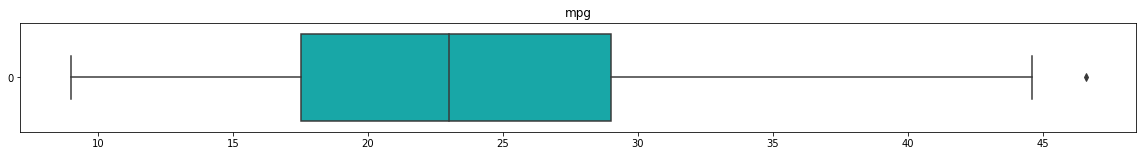

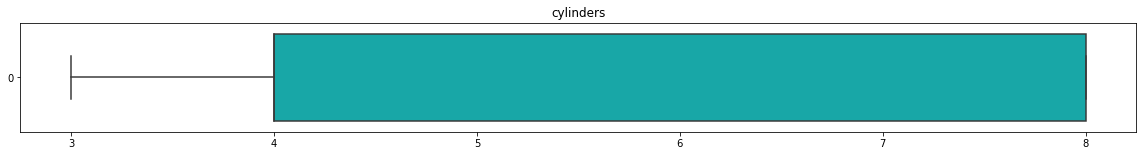

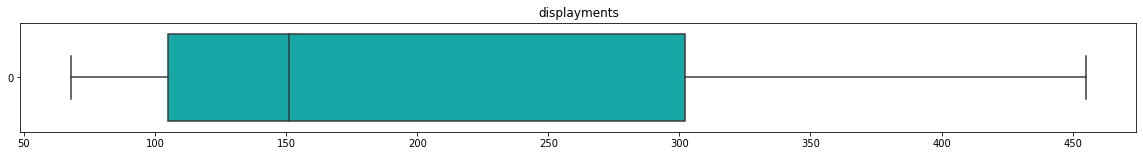

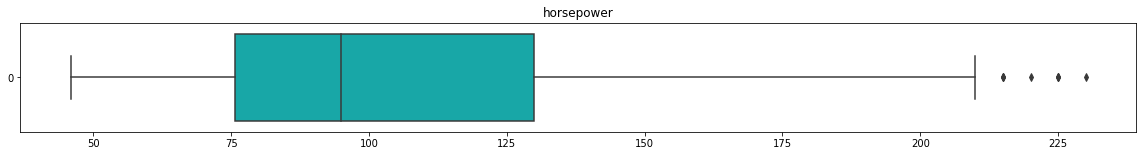

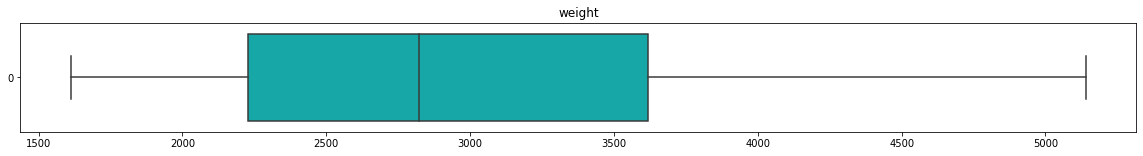

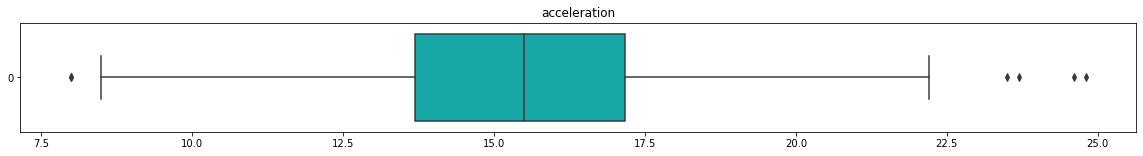

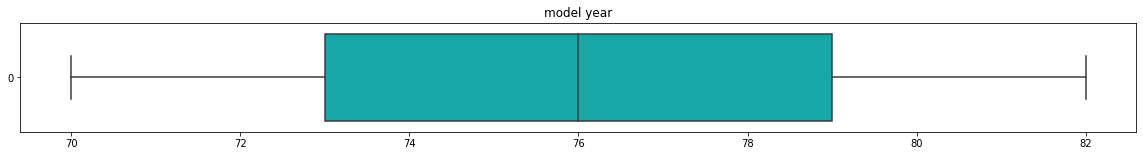

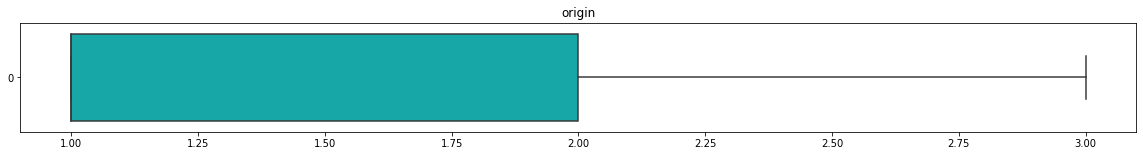

In [9]:
for i in df._get_numeric_data().columns:
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 2))
  sns.boxplot(data=df[i], orient="h", color='c').set_title(i)
  plt.show()


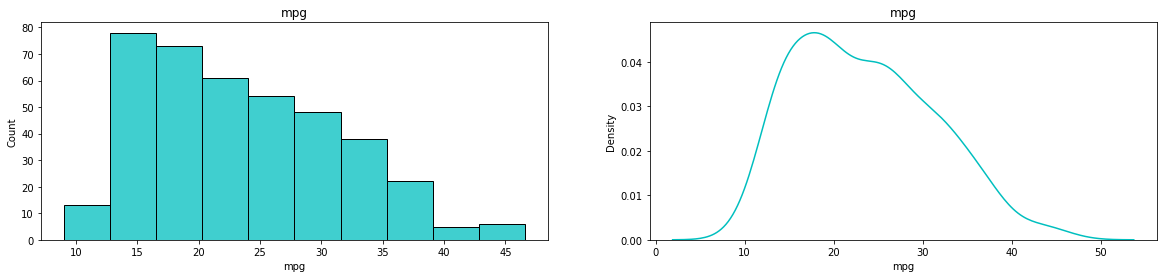

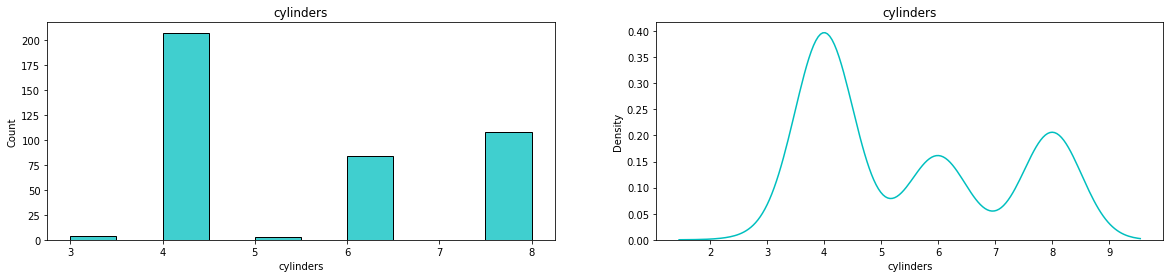

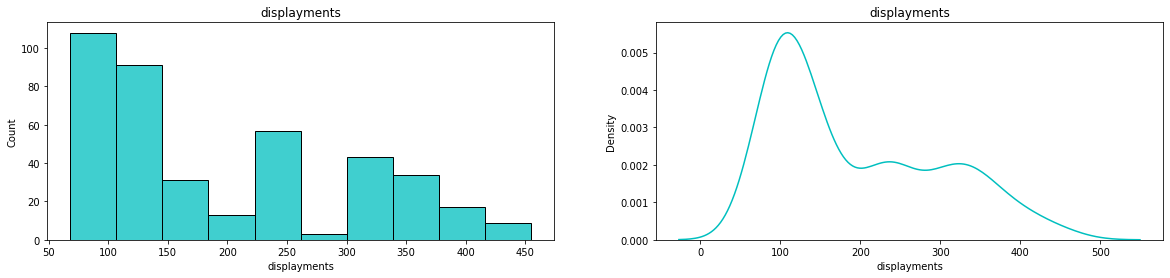

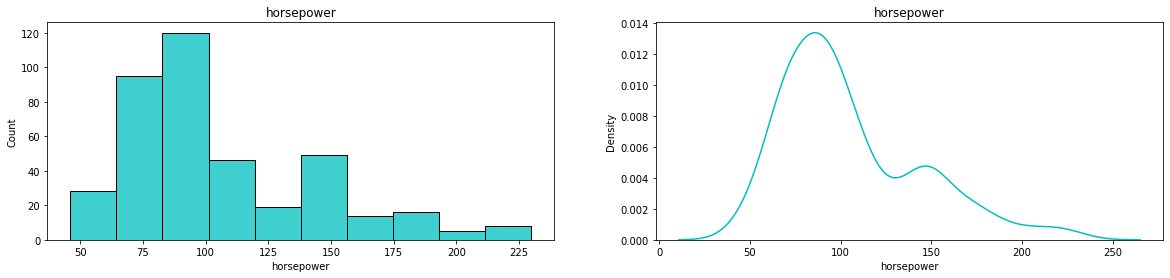

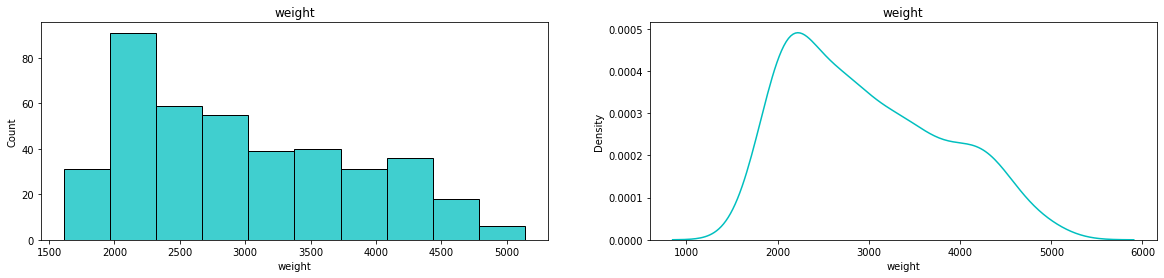

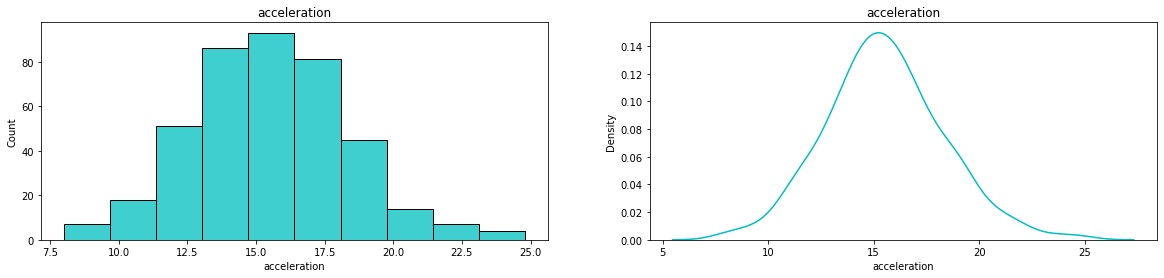

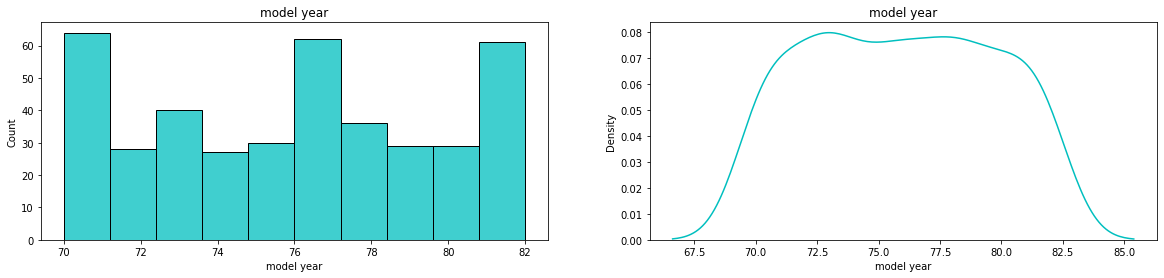

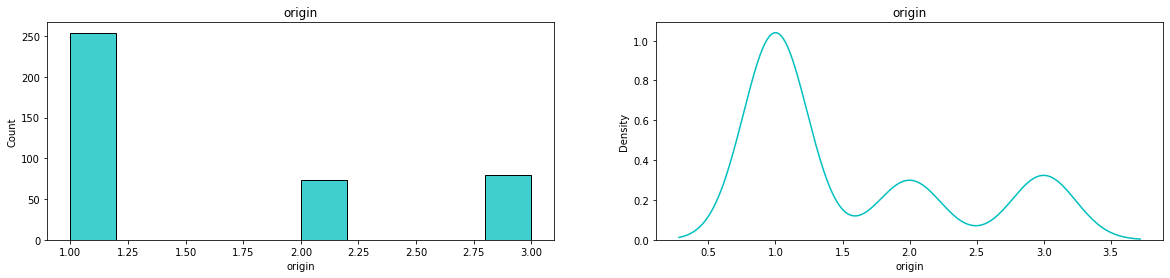

In [10]:
for i in df._get_numeric_data().columns:
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
  sns.histplot(df[i], bins=10, ax=axes[0], color='c')
  axes[0].set_title(i)
  sns.kdeplot(df[i], ax=axes[1], color='c')
  axes[1].set_title(i)
  plt.show()

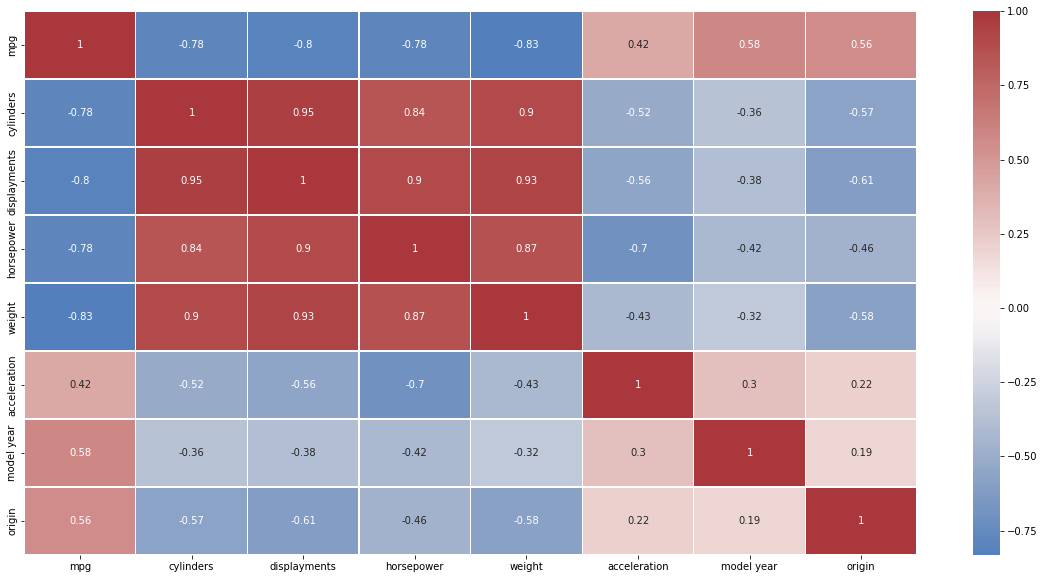

In [11]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, center=0,cmap="vlag",linewidths=0.4)
plt.show()

# Σχέση Mpg με τις μεταβλητές weight, horsepower, model year και cylinders

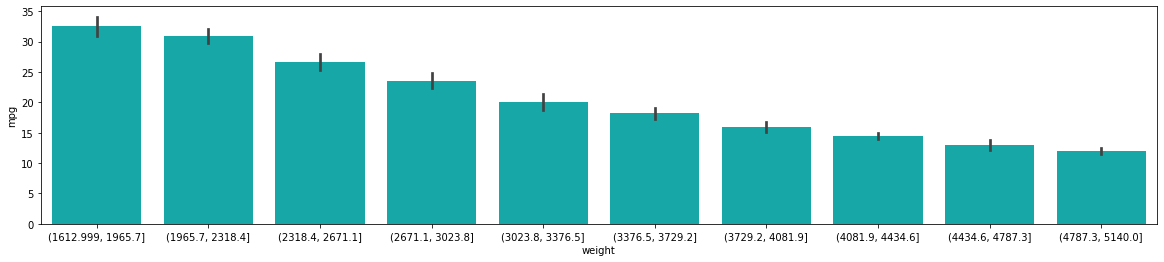

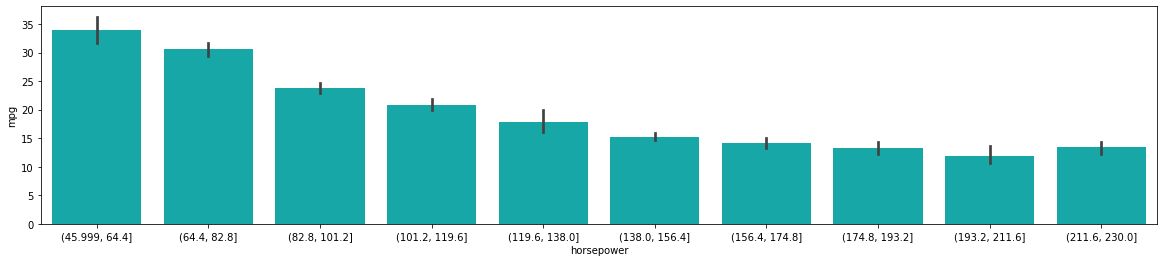

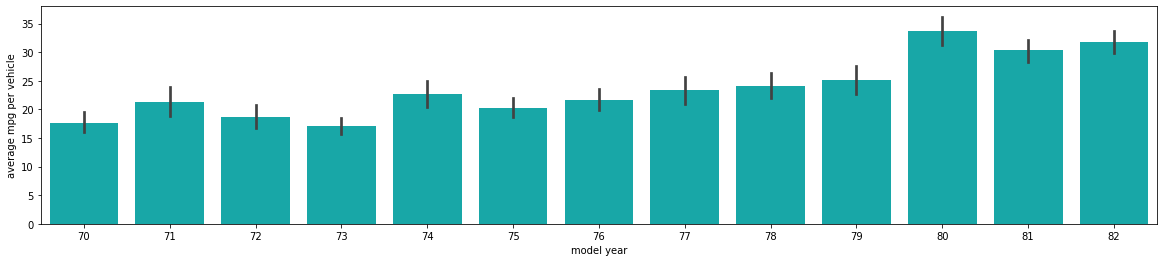

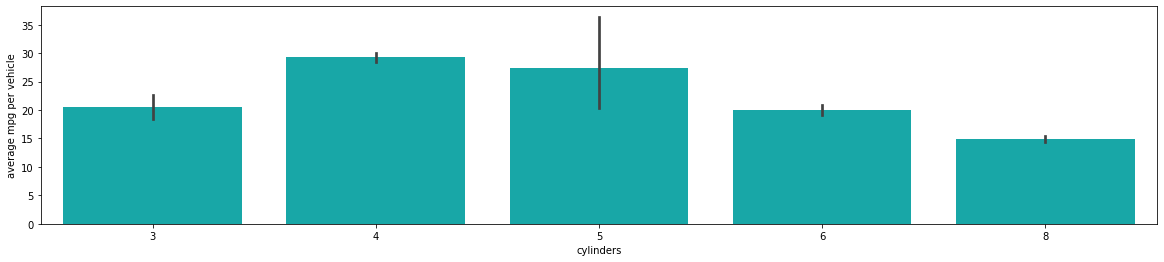

In [12]:
df['weight'] = df['weight'].astype(float)


for x in ['weight','horsepower','model year','cylinders']:
  if df[x].dtypes == float:
    bin_size=(df[x].max()-df[x].min())/10
    bins=[df[x].min()]
    for i in range(10):
      bins.append(bins[0]+(i+1)*bin_size)
  
    fig = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
    out = pd.cut(df[x], bins, include_lowest=True)
    sns.barplot(x=out, y='mpg',color='c' , data=df)
  else:
    fig= plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
    sns.barplot(x=x, y='mpg',color='c' , data=df)
    plt.ylabel('average mpg per vehicle')

  
  plt.show()

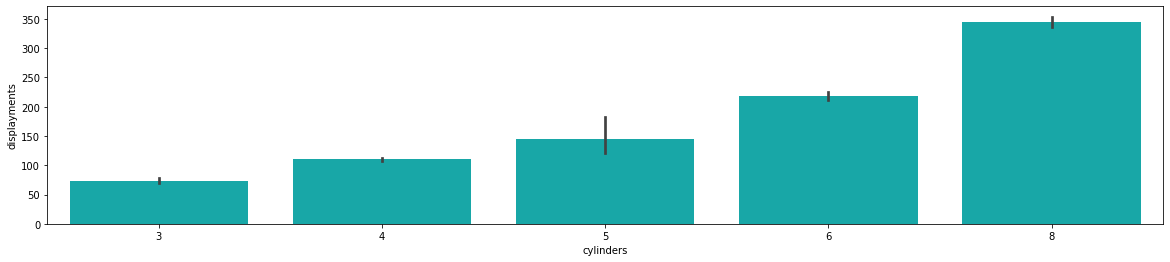

In [13]:
fig= plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
sns.barplot(x='cylinders', y='displayments', data=df, color='c')
  
plt.show()

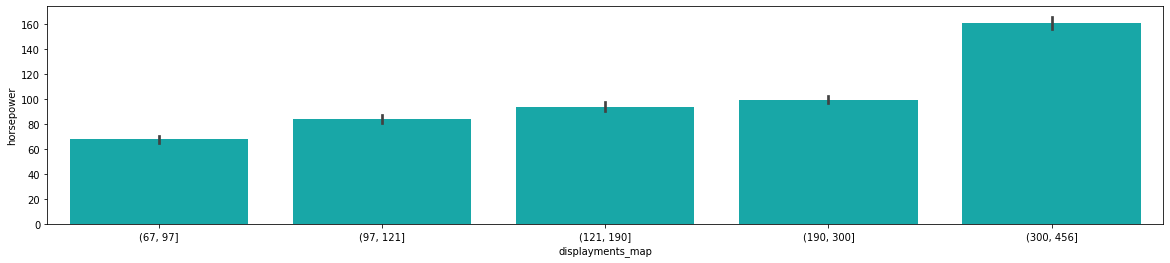

In [14]:
displayments_map = pd.cut(df['displayments'],bins=(67,97,121,190,300,456))  #μπορώ να βάλω bins=5
df2= pd.DataFrame({
    'displayments_map':displayments_map,
    'mpg':df['mpg']
})

#df2.groupby('displayments_map')['mpg'].count() check the bins

df2 = pd.concat([df2, df['horsepower']], axis=1)

fig = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
sns.barplot(x='displayments_map', y='horsepower', data=df2, color='c')

plt.show()


# Preprocessing

In [211]:
df[df['mpg'].isnull()]

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
10,NaN,4,133.0,115.0,3090,17.5,70,2,citroen ds-21 pallas
11,NaN,8,350.0,165.0,4142,11.5,70,1,chevrolet chevelle concours (sw)
12,NaN,8,351.0,153.0,4034,11.0,70,1,ford torino (sw)
13,NaN,8,383.0,175.0,4166,10.5,70,1,plymouth satellite (sw)
14,NaN,8,360.0,175.0,3850,11.0,70,1,amc rebel sst (sw)
17,NaN,8,302.0,140.0,3353,8.0,70,1,ford mustang boss 302
39,NaN,4,97.0,48.0,1978,20.0,71,2,volkswagen super beetle 117
367,NaN,4,121.0,110.0,2800,15.4,81,2,saab 900s


In [212]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
133,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
337,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
343,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
361,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
382,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [213]:
df.isna().sum()

mpg             8
cylinders       0
displayments    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Missing Values in mpg

In [214]:
df_re_missing = df.dropna(axis = 0,subset=['mpg'])

Missing Values in horsepower

In [215]:
median_value = df_re_missing['horsepower'].median()
df_re_missing['horsepower'] =df_re_missing['horsepower'].fillna(median_value)

df_re_missing.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mpg             0
cylinders       0
displayments    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [216]:
df_prepro = df_re_missing.copy()

In [217]:
df_prepro['car_company'] = df_prepro['car name'].apply(lambda x: x.split()[0])

In [218]:
df_prepro['car_company'].value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
fiat              8
peugeot           8
audi              7
vw                6
chrysler          6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
mercedes-benz     2
maxda             2
cadillac          2
toyouta           1
triumph           1
hi                1
nissan            1
mercedes          1
chevroelt         1
capri             1
vokswagen         1
Name: car_company, dtype: int64

In [219]:
df_prepro['car_company'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [220]:
df_prepro.replace({'vokswagen': 'volkswagen',
            'vw': 'volkswagen', 
            'maxda': 'mazda', 
            'toyouta': 'toyota',
            'mercedes-benz': 'mercedes',
            'chevy': 'chevrolet',
            'chevroelt': 'chevrolet',
            'capri': 'ford'}, inplace=True)

In [221]:
df_prepro['car_company'].nunique()

29

In [222]:
df_prepro.groupby('origin')['car_company'].nunique()

origin
1    12
2    11
3     6
Name: car_company, dtype: int64

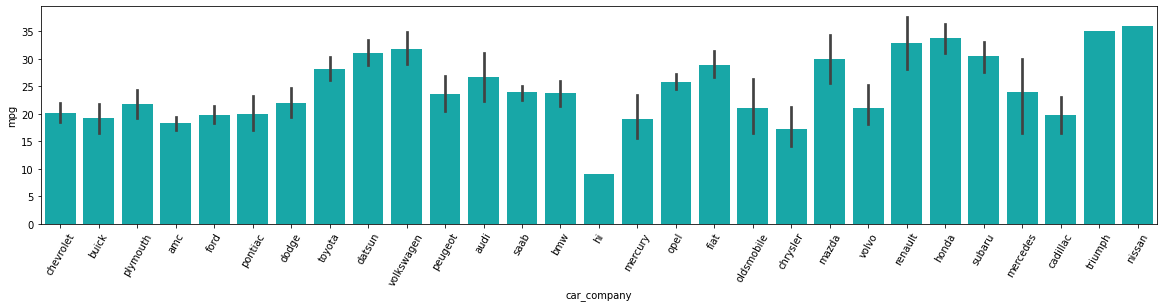

In [27]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
sns.barplot(x='car_company', y='mpg', data=df_prepro, color='c')
plt.xticks(rotation=60)

plt.show()

# Outliers

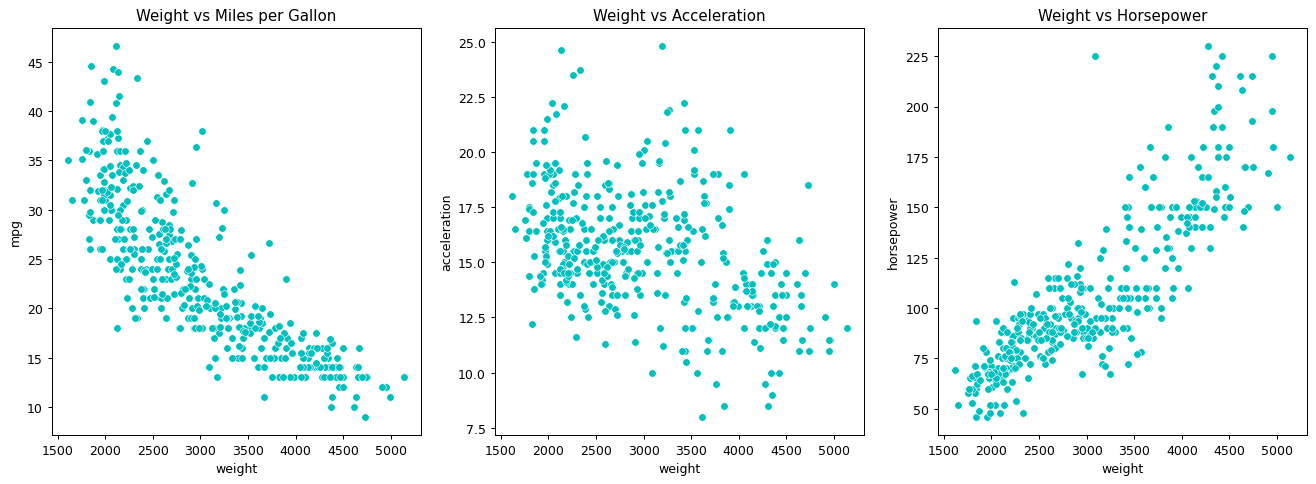

In [28]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3, dpi=90)

sns.scatterplot(x="weight", y="mpg", data=df_prepro, ax=axes[0], color='c')
axes[0].set_title("Weight vs Miles per Gallon")

sns.scatterplot(x="weight", y="acceleration", data=df_prepro, ax=axes[1], color='c')
axes[1].set_title("Weight vs Acceleration")

sns.scatterplot(x="weight", y="horsepower", data=df_prepro,  ax=axes[2], color='c')
axes[2].set_title("Weight vs Horsepower")

plt.show()

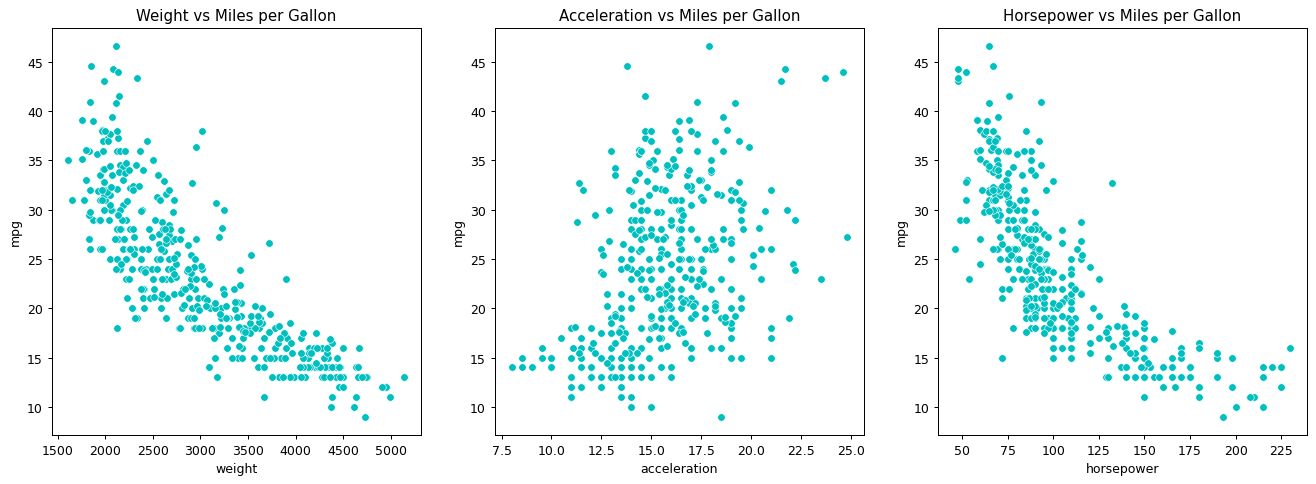

In [29]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3, dpi=90)

sns.scatterplot(x="weight", y="mpg", data=df_prepro, ax=axes[0], color='c')
axes[0].set_title("Weight vs Miles per Gallon")

sns.scatterplot(x="acceleration", y="mpg", data=df_prepro, ax=axes[1], color='c')
axes[1].set_title("Acceleration vs Miles per Gallon")

sns.scatterplot(x="horsepower", y="mpg", data=df_prepro,  ax=axes[2], color='c')
axes[2].set_title("Horsepower vs Miles per Gallon")

plt.show()

In [223]:
df_prepro.shape

(398, 10)

In [224]:
def outliers(df, col_name, q1=0.10, q3=0.90):
  quartile1 = df[col_name].quantile(q1)
  quartile3 = df[col_name].quantile(q3)
  IQR = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * IQR
  low_limit = quartile1 - 1.5 * IQR
  return df[(df[col_name]>=low_limit) & (df[col_name]<=up_limit)]

In [225]:
outliers(df_prepro,'acceleration').shape

(398, 10)

In [226]:
df_prepro = outliers(df_prepro,'acceleration')

In [227]:
outliers(df_prepro,'horsepower').shape

(398, 10)

In [228]:
df_prepro = outliers(df_prepro,'horsepower')

In [229]:
df_prepro = df_prepro.drop(columns='car name')

In [230]:
df_prepro

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car_company
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford
402,44.0,4,97.0,52.0,2130,24.6,82,2,volkswagen
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford


In [231]:
car = dict(df_prepro['car_company'].value_counts())

In [233]:
car_comp = list(car.keys())

In [234]:
car_city = ['Dearborn, Michigan', 
'Detroit, Michigan', 
'Auburn Hills, Michigan',
'Southfield, Michigan',
'Auburn Hills, Michigan',
'Aichi, Japan',
'Tokyo, Japan',
'Wolfsburg, Germany',
'Detroit, Michigan',
'Detroit, Michigan',
'Tokyo, Japan',
'Hiroshima, Japan',
'Dearborn, Michigan',
'Lansing, Michigan',
'Turin, Italy',
'Sochaux, France',
'Ingolstadt, Germany',
'Gothenburg, Sweden',
'Detroit, Michigan',
'Paris, France',
'Trollhättan, Sweden',
'Rüsselsheim am Main, Germany',
'Tokyo, Japan',
'Stuttgart, Germany',
'Munich, Germany',
'Warren, Michigan',
'Detroit, Michigan',
'Coventry, England',
'Chicago, Illinois']

In [235]:
res = dict(zip(list(car.keys()), car_city))
df_prepro_powerbi = df_prepro.copy()
car_list = []
for i in df_prepro_powerbi['car_company']:
  car_list.append(res[i])

car_list = pd.DataFrame(car_list)
car_list.index = df_prepro_powerbi.index
df_prepro_powerbi['car_list']= pd.DataFrame(car_list)

In [236]:
df_prepro_powerbi.columns

Index(['mpg', 'cylinders', 'displayments', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car_company', 'car_list'],
      dtype='object')

In [43]:
new = df_prepro_powerbi["car_list"].str.split(",", n = 1, expand = True)
  
# making separate first name column from new data frame
df_prepro_powerbi["City"]= new[0]
  
# making separate last name column from new data frame
df_prepro_powerbi["Country"]= new[1]

In [44]:
df_prepro_powerbi['City'].unique()  #21

array(['Detroit', 'Auburn Hills', 'Southfield', 'Dearborn', 'Aichi',
       'Tokyo', 'Wolfsburg', 'Turin', 'Ingolstadt', 'Munich', 'Coventry',
       'Rüsselsheim am Main', 'Sochaux', 'Lansing', 'Hiroshima',
       'Gothenburg', 'Paris', 'Trollhättan', 'Stuttgart', 'Warren',
       'Chicago'], dtype=object)

In [45]:
df_prepro_powerbi['Country'].unique() #8

array([' Michigan', ' Japan', ' Germany', ' Italy', ' England', ' France',
       ' Sweden', ' Illinois'], dtype=object)

In [46]:
#from google.colab import files
#df_prepro_powerbi.to_csv('data_after_prepr.csv') 
#files.download('data_after_prepr.csv')

In [238]:
#origin = df_prepro.pop('origin')
 
#df_prepro['USA'] = (origin == 1)*1
#df_prepro['Europe'] =(origin == 2)*1
#df_prepro['Japan'] = (origin == 3)*1
#df_prepro

dict_region = {1:'USA',2:'Europe',3:'Japan'}
df_prepro['origin'] = df_prepro['origin'].replace(dict_region)

In [239]:
df_prepro

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car_company
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,USA,ford
402,44.0,4,97.0,52.0,2130,24.6,82,Europe,volkswagen
403,32.0,4,135.0,84.0,2295,11.6,82,USA,dodge
404,28.0,4,120.0,79.0,2625,18.6,82,USA,ford


In [240]:
df_prepro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displayments  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car_company   398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


In [291]:
#X =  df_prepro.drop(columns='mpg')
y =  df_prepro['mpg']
X = df_prepro.iloc[:,[1,2,3,4,5,6,8]]


In [292]:
seed = 42  # random seed for reproducability

# it handles both shuffling and splitting
# x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=seed)

In [293]:
X_train.head()

,cylinders,displayments,horsepower,weight,acceleration,model year,car_company
3,8,304.0,150.0,3433,12.0,70,amc
24,4,97.0,88.0,2130,14.5,70,datsun
384,4,91.0,68.0,2025,18.2,82,mazda
255,4,91.0,60.0,1800,16.4,78,honda
184,4,115.0,95.0,2694,15.0,75,audi


In [294]:
#OneHotEncoder  https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki
X_train = X_train.reset_index()
encoder = OneHotEncoder( handle_unknown="ignore")
enc = pd.DataFrame(encoder.fit_transform(X_train[['car_company']]).toarray())
X_train = X_train.join(enc)
X_train.set_index('index', inplace=True)
#drop 'car_company','origin'
X_train = X_train.drop(columns=['car_company'])


In [295]:
X_test = X_test.reset_index()
enc = pd.DataFrame(encoder.transform(X_test[['car_company']]).toarray())
X_test = X_test.join(enc)
X_test.set_index('index', inplace=True)
#drop 'car_company','origin'
X_test = X_test.drop(columns=['car_company'])

In [298]:
#StandardScaler  https://www.geeksforgeeks.org/normalization-vs-standardization/
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [299]:
lassoReg = linear_model.Lasso()
linear = LinearRegression()
knr = KNeighborsRegressor()
regr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
model = [lassoReg, linear, knr, regr, svr, rfr]
for i in model:
  i.fit(X_train, y_train)

  pred_test = i.predict(X_test)
  print(i)
  print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
  print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
  print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')
  print(f'Score: {i.score(X_test, y_test)}\n\n')

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Mean Squared Error: 9.010490390571439
Root Mean Squared Error: 3.001747889242439
Mean Absolute Error: 2.3025693885620244
Score: 0.8324142390285681


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean Squared Error: 4.0009093555254286e+24
Root Mean Squared Error: 2000227325962.084
Mean Absolute Error: 223632213567.64258
Score: -7.441275778120303e+22


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Mean Squared Error: 11.03365
Root Mean Squared Error: 3.321693845013414
Mean Absolute Error: 2.4505
Score: 0.7947855719953582


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features

# Regression

https://eclass.upatras.gr/modules/document/file.php/ECON1332/Lectures/Lecture%203/06Regression.pdf

https://machinelearningmastery.com/regression-metrics-for-machine-learning/

In [155]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [156]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}

In [ ]:
#OneHotEncoder
X_test = X_test.reset_index()
enc = pd.DataFrame(encoder.transform(X_test[['car_company','origin']]).toarray())
X_test = X_test.join(enc)
X_test.set_index('index', inplace=True)
#drop 'car_company','origin'
X_test = X_test.drop(columns=['origin','car_company'])
#StandardScaler
X_test = scaler.transform(X_test)
#Predict
pred_test = model.predict(X_test) 

In [163]:
# intercept:
print(model.intercept_)

# slope or x-coefficient
print(model.coef_)

23.44658511777497
[ 1.208e+00 -8.120e-01 -5.270e+00  9.766e-02  2.755e+00  8.425e+12
  4.550e+12  2.894e+12  7.735e+12  2.050e+12  1.107e+13  2.894e+12
  8.640e+12  9.432e+12  4.077e+12  1.202e+13  2.050e+12  5.364e+12
  5.364e+12  3.537e+12  6.060e+12  4.550e+12  3.537e+12  4.975e+12
  8.847e+12  6.060e+12  3.537e+12  2.894e+12  4.077e+12  8.425e+12
  2.050e+12  7.487e+12  4.077e+12]


In [164]:
print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')  

Mean Squared Error: 8.166920764483173
Root Mean Squared Error: 2.8577824907580305
Mean Absolute Error: 2.220932891033717


In [165]:
model.score(X_train, y_train)

0.8406898998886411

In [166]:
model.score(X_test, y_test)

-1.7021065385008233e+23

In [167]:
r2_score(y_test,pred_test)   #https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

0.8576977403726711

# KNeighborsRegressor

In [124]:
knr = KNeighborsRegressor(n_neighbors=8)
knr.fit(X_train, y_train)

pred_test = knr.predict(X_test)

In [170]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

In [125]:
knr.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}

In [182]:
np.arange(1, 4, 1)

array([1, 2, 3])

In [300]:
param_grid = {'n_neighbors': np.arange(1, 40, 1),
              'weights': ['uniform', 'distance'],
              'leaf_size':np.arange(1, 40, 1),
              'p':np.arange(1, 4, 1)}


knn = KNeighborsRegressor()
gscv = GridSearchCV(knn, param_grid, cv=KFold(n_splits=3,
                                              shuffle=True, random_state=0))
gscv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'p': array([1, 2, 3]),
                         'weights': [

In [301]:
gscv.best_score_

0.7700368137879918

In [302]:
gscv.cv_results_

{'mean_fit_time': array([0.002, 0.002, 0.002, ..., 0.001, 0.001, 0.001]),
 'mean_score_time': array([0.006, 0.006, 0.007, ..., 0.004, 0.026, 0.026]),
 'mean_test_score': array([0.641, 0.641, 0.633, ..., 0.698, 0.439, 0.588]),
 'param_leaf_size': masked_array(data=[1, 1, 1, ..., 39, 39, 39],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[1, 1, 1, ..., 39, 39, 39],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_p': masked_array(data=[1, 1, 2, ..., 2, 3, 3],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', ..., 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
 

In [303]:
gscv.score(X_test, y_test)

0.8301788209546724

In [126]:
print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')  

Mean Squared Error: 18.234024739583333
Root Mean Squared Error: 4.2701317004962895
Mean Absolute Error: 3.204895833333333


In [127]:
knr.score(X_train, y_train)

0.7313906317824017

In [128]:
knr.score(X_test, y_test)

0.6822862621824974

In [66]:
# fit/predict with different number of neighbors

for k in range(1, 20):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train, y_train)  
    print(f'{k} --> {knr.score(X_test, y_test)}')

1 --> 0.7275205689980193
2 --> 0.7726085194169087
3 --> 0.7762622465925444
4 --> 0.7886345758640584
5 --> 0.8096854787796897
6 --> 0.8085727106819608
7 --> 0.8074380752035664
8 --> 0.7989724015827251
9 --> 0.7832976480834327
10 --> 0.7745030793486318
11 --> 0.7703225620238873
12 --> 0.755076786650761
13 --> 0.7516478650371115
14 --> 0.7389264886948361
15 --> 0.7377425270633291
16 --> 0.7180251908544026
17 --> 0.7209350565467688
18 --> 0.7192291492345355
19 --> 0.7103562330229598


In [129]:
knr_accuracies=[]

for k in range(1, 150):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train, y_train)  
    knr_accuracies.append(knr.score(X_test, y_test))

Best accuracy 73.74% for k=4


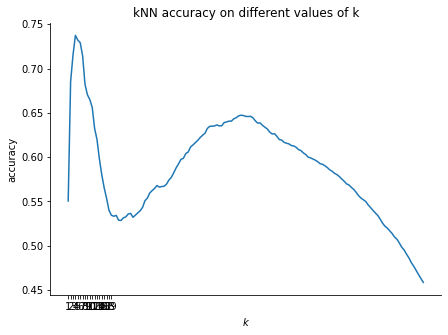

In [130]:
fig = plt.figure(figsize=(7, 5))

ax = plt.subplot(111)
ax.plot(range(1, 150, 1), knr_accuracies)

# aesthetic parameters
ax.set_xticks(range(1, 20))
ax.set_xlabel('$k$')
ax.set_ylabel('accuracy')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title('kNN accuracy on different values of k')

print(f'Best accuracy {max(knr_accuracies) * 100:.2f}% for k={list(range(1, 150))[np.argmax(knr_accuracies)]}')

# DecisionTreeRegressor

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
regr = DecisionTreeRegressor(max_depth=140)

In [132]:
regr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 140,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [133]:
regr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=140,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [134]:
pred_test = regr.predict(X_test)

In [135]:
print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')  

Mean Squared Error: 13.373416666666666
Root Mean Squared Error: 3.656968234298278
Mean Absolute Error: 2.5208333333333335


In [136]:
regr.score(X_train, y_train)

1.0

In [137]:
regr.score(X_test, y_test)

0.7669785877095039

In [ ]:
for k in range(1, 100):
    regr = DecisionTreeRegressor(max_depth=k)
    regr.fit(X_train, y_train)    
    print(f'{k} --> {regr.score(X_test, y_test)}')

In [139]:
regr_accuracies=[]

for k in range(1, 100):
    regr = DecisionTreeRegressor(max_depth=k)
    regr.fit(X_train, y_train)  
    regr_accuracies.append(regr.score(X_test, y_test))

Best accuracy 81.81% for k=91


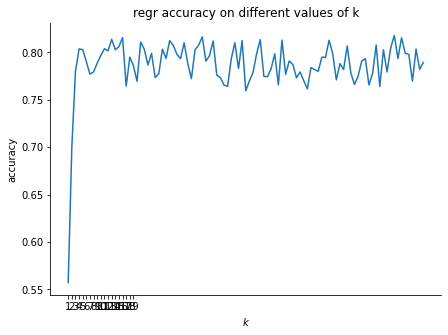

In [140]:
fig = plt.figure(figsize=(7, 5))

ax = plt.subplot(111)
ax.plot(range(1, 100, 1), regr_accuracies)

# aesthetic parameters
ax.set_xticks(range(1, 20))
ax.set_xlabel('$k$')
ax.set_ylabel('accuracy')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title('regr accuracy on different values of k')

print(f'Best accuracy {max(regr_accuracies) * 100:.2f}% for k={list(range(1, 150))[np.argmax(regr_accuracies)]}')

# SVR 

In [79]:
from sklearn.svm import SVR

In [141]:
svr = SVR()

svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [101]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [142]:
pred_test = svr.predict(X_test)

svr.score(X_test, y_test)

0.6788033172132472

In [143]:
svr.score(X_train, y_train)

0.7067620169890333

In [144]:
print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')  

Mean Squared Error: 18.433915701718547
Root Mean Squared Error: 4.293473617214684
Mean Absolute Error: 3.1298482487742225


# RandomForestRegressor

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(X_train, y_train)
pred_test = rfr.predict(X_test)

In [146]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [147]:
rfr.score(X_train, y_train)

0.8821093736352582

In [148]:
rfr.score(X_test, y_test)

0.8576977403726711

In [149]:
print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')  

Mean Squared Error: 8.166920764483173
Root Mean Squared Error: 2.8577824907580305
Mean Absolute Error: 2.220932891033717


# Lasso Regression

In [111]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
lassoReg.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [112]:
pred_test = lassoReg.predict(X_test)

In [113]:
print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')  

Mean Squared Error: 10.650408364318714
Root Mean Squared Error: 3.26349634047883
Mean Absolute Error: 2.66692172441454


In [114]:
lassoReg.score(X_train, y_train)

0.8355057204688828

In [115]:
lassoReg.score(X_test, y_test)

0.8144248952692923

# Pipe

In [200]:
lassoReg = linear_model.Lasso(alpha=0.1)
linear = LinearRegression()
knr = KNeighborsRegressor(n_neighbors=8)
regr = DecisionTreeRegressor(max_depth=140)
svr = SVR()
rfr = RandomForestRegressor(max_depth=3)
scaler = StandardScaler()
model = [lassoReg, linear, knr, regr, svr, rfr]
for i in model:
  i.fit(X_train, y_train)

  pred_test = i.predict(X_test)
  print(i)
  print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
  print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
  print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')
  print(f'Score: {i.score(X_test, y_test)}\n\n')

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Mean Squared Error: 10.650408364318714
Root Mean Squared Error: 3.26349634047883
Mean Absolute Error: 2.66692172441454
Score: 0.8144248952692923


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean Squared Error: 9.768621572875781e+24
Root Mean Squared Error: 3125479414885.944
Mean Absolute Error: 285315929761.1835
Score: -1.7021065385008233e+23


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')
Mean Squared Error: 18.234024739583333
Root Mean Squared Error: 4.2701317004962895
Mean Absolute Error: 3.204895833333333
Score: 0.6822862621824974


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=140,
                

In [ ]:

  pipe =make_pipeline(scaler, i)

In [ ]:
#https://srnghn.medium.com/machine-learning-trying-to-predict-a-numerical-value-8aafb9ad4d36


#Most Common Regression Algorithms
#Below are introductions on the most common algorithms 
#for predicting a numerical value: Linear Regression, 
#Decision Trees, Neural Networks, and K-Nearest Neighbors

In [ ]:
PCA

In [ ]:
df_prepro = df_prepro.drop(columns='origin')
df_prepro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 405
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displayments  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car_company   398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 28.0+ KB


In [108]:
q = df_prepro.iloc[:,[2,3,4,5,6,8]]
q

,displayments,horsepower,weight,acceleration,model year,car_company
0,307.0,130.0,3504.0,12.0,70,chevrolet
1,350.0,165.0,3693.0,11.5,70,buick
2,318.0,150.0,3436.0,11.0,70,plymouth
3,304.0,150.0,3433.0,12.0,70,amc
4,302.0,140.0,3449.0,10.5,70,ford
...,...,...,...,...,...,...
401,140.0,86.0,2790.0,15.6,82,ford
402,97.0,52.0,2130.0,24.6,82,volkswagen
403,135.0,84.0,2295.0,11.6,82,dodge
404,120.0,79.0,2625.0,18.6,82,ford


In [110]:
# only with displayments	horsepower	weight	acceleration	model year	car_company
X =  df_prepro.iloc[:,[2,3,4,5,6,8]]
y =  df_prepro['mpg']

seed = 42  # random seed for reproducability

# it handles both shuffling and splitting
# x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=seed)

X_train = X_train.reset_index()
encoder = OneHotEncoder( handle_unknown="ignore")
enc = pd.DataFrame(encoder.fit_transform(X_train[['car_company']]).toarray())
X_train = X_train.join(enc)
X_train.set_index('index', inplace=True)
X_train = X_train.drop(columns=['car_company'])
X_train = scaler.fit_transform(X_train)

#OneHotEncoder
X_test = X_test.reset_index()
enc = pd.DataFrame(encoder.transform(X_test[['car_company']]).toarray())
X_test = X_test.join(enc)
X_test.set_index('index', inplace=True)
#drop 'car_company','origin'
X_test = X_test.drop(columns=['car_company'])
#StandardScaler
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
#Predict
pred_test = model.predict(X_test) 